# Tracking FII flows

Plots the Foreign Institutional Investment flows in/out of Indian capital markets.
Follows the documentation [here](https://github.com/shyams80/plutons/blob/master/docs-R/InvestmentFlowsIndia.ipynb)

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)
library(ggrepel)
library(lubridate)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")

#initialize
iflows <- InvestmentFlowsIndia()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from

In [2]:
fiiDebt <- iflows$FiiCashMarket() %>%
    filter(SECURITY_TYPE == 'Debt') %>%
    collect() %>%
    mutate(Y=year(TIME_STAMP), M=month(TIME_STAMP)) %>%
    group_by(Y, M) %>%
    summarize(NET = sum(BUY_VALUE - SELL_VALUE), N = n()) %>%
    ungroup() %>%
    arrange(Y, M) %>%
    mutate(YM = paste0(as.character(Y), str_pad(M, 2, pad="0"))) %>%
    filter(N > 15) %>%
    select(YM, NET) %>%
    as.data.frame()

### plot the flows

In [3]:
plotFiiFlows <- function(fiiDf, mainTitle){
    xAxisTicks <- fiiDf[seq(from=1, to=nrow(fiiDf), length.out=20), 'YM']
    firstDate <- first(fiiDf$YM)
    lastDate <- last(fiiDf$YM)

    ggplot(fiiDf, aes(x=YM, y=NET)) +
        theme_economist() +
        theme(axis.text.x=element_text(angle=90, hjust=1)) +
        geom_bar(stat="identity", position=position_dodge()) +
        scale_x_discrete(breaks = xAxisTicks) +
        #geom_text_repel(aes(label= round(NET, 2)), position = position_dodge(0.9)) +
        labs(x='', y='Rs. Crore', color='', title=mainTitle, 
             subtitle=sprintf("[%s:%s]", firstDate, lastDate)) +
        annotate("text", x=firstDate, y=min(fiiDf$NET, na.rm=T), label = "@StockViz", 
                 hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)
    
    #print(summary(fiiDf$NET))
}

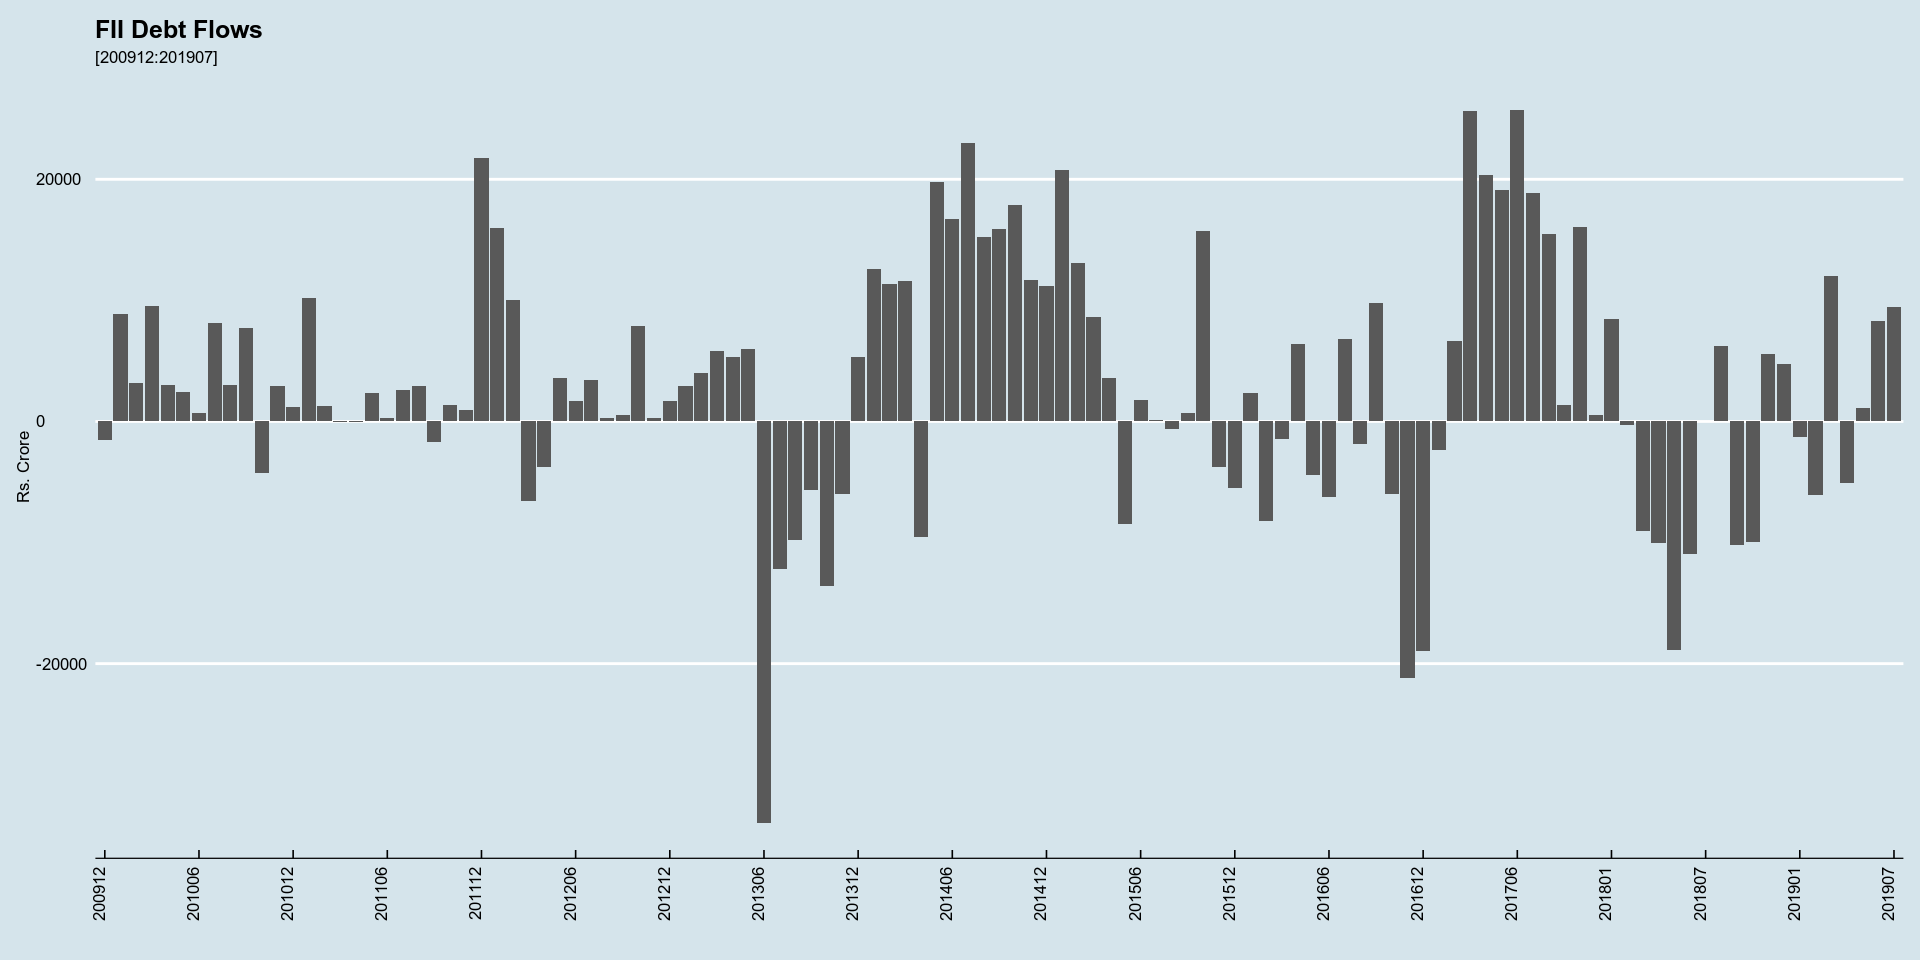

In [4]:
plotFiiFlows(fiiDebt, "FII Debt Flows")

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)